In [1]:
from utils_package import *
from utils_package.loaders import build_loaders
from utils_package.net_UNET import UnetNoSigmoid
from utils_package.constants import IN_CHANNELS, OUT_CHANNELS, LEARNING_RATE, MIN_EPOCHS, MAX_EPOCHS, DEVICE, EARLY_STOP_COUNT
from utils_package.train_function import train_loop, test_loop
from utils_package.plot import plot_batch, plot_loss, plot_avg_metric
from utils_package.utils import early_stopping, save_model, load_model

In [2]:
model = UnetNoSigmoid(IN_CHANNELS, OUT_CHANNELS).to(device = DEVICE)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE)
train_loader, test_loader = build_loaders()
checkpoint = "models/bce_logits.pth"

# ----- LOAD THE MODEL -----
if os.path.exists(checkpoint):
    model, optimizer, loss_fn = load_model(model, optimizer, checkpoint)

In [3]:
def main():
    # ----- PLOT SAMPLE OF IMAGES AND TARGETS -----
    images, targets, classes = next(iter(train_loader))
    plot_batch(images[10::], targets[10::], classes[10::], 10, (30, 6))

    train_losses = []
    test_losses = []
    iou_scores = []
    dice_scores = []
    pixel_errors = []
    stop_count = 0

    for epoch in range(MAX_EPOCHS):
        avg_train_loss = train_loop(train_loader, model, optimizer, loss_fn, epoch, hpc=False)
        avg_test_loss, avg_iou_scores, avg_dice_scores, avg_pixel_error = test_loop(test_loader, model, loss_fn, hpc=False)

        train_losses.append(avg_train_loss)
        test_losses.append(avg_test_loss)
        iou_scores.append(avg_iou_scores)
        dice_scores.append(avg_dice_scores)
        pixel_errors.append(avg_pixel_error)

        # ----- PLOT EVALUATION METRICS -----
        plot_loss(train_losses, "Train Losses", "losses", path="plots/train_loss")
        plot_loss(test_losses, "Validation Losses", "losses", path="plots/test_loss")
        plot_avg_metric(iou_scores, "IoU Score Per Class", path = "plots/iou")
        plot_avg_metric(dice_scores, "Dice Score Per Class", path = "plots/dice")
        plot_avg_metric(pixel_errors, "Pixel Error Per Class", path = "plots/pixel_error")

        # ----- SAVE THE CHECKPOINT OF THE MODEL -----
        save_model(model.state_dict(), optimizer.state_dict(), loss_fn, checkpoint)

        # ----- CHECK EARLY STOPPING -----
        if early_stopping(test_losses): stop_count += 1
        else: stop_count = 0

        if stop_count >= EARLY_STOP_COUNT and epoch >= MIN_EPOCHS:
            break

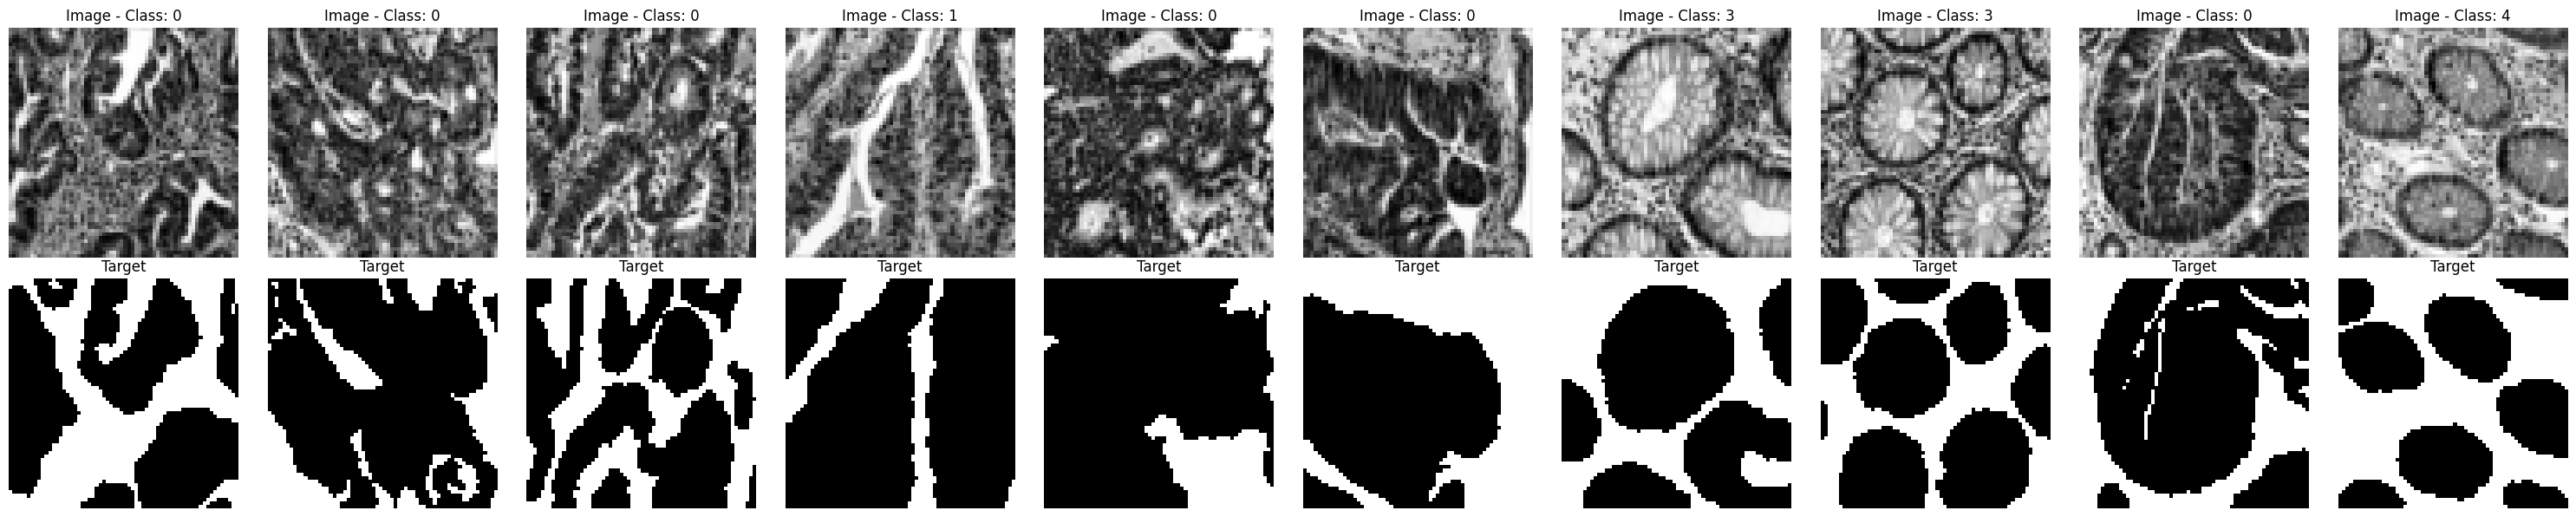

Testing the model... : 100%|██████████| 14/14 [00:23<00:00,  1.71s/it]


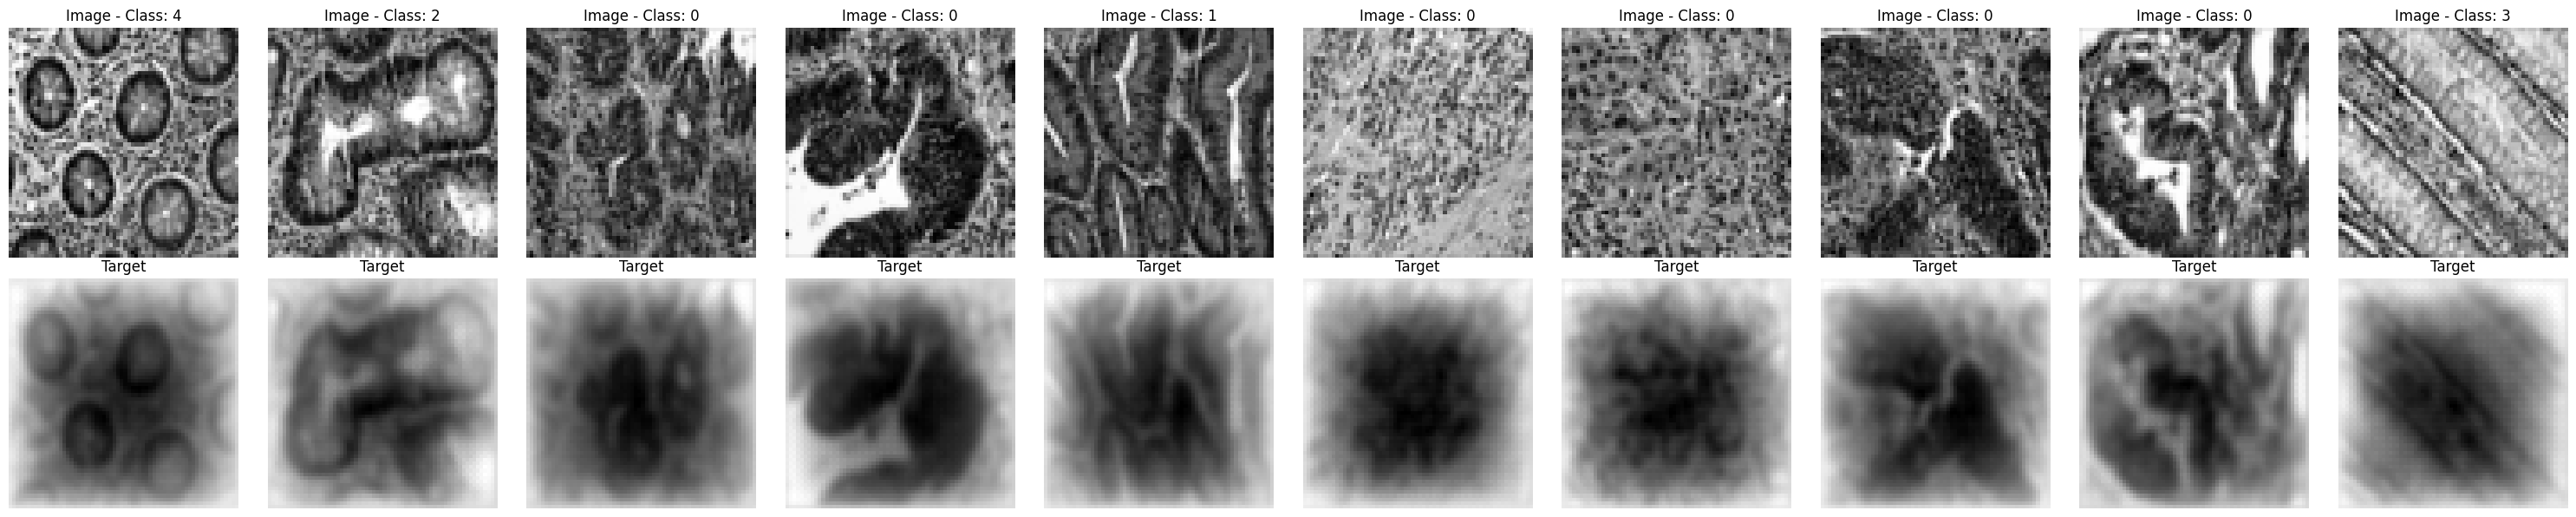

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]


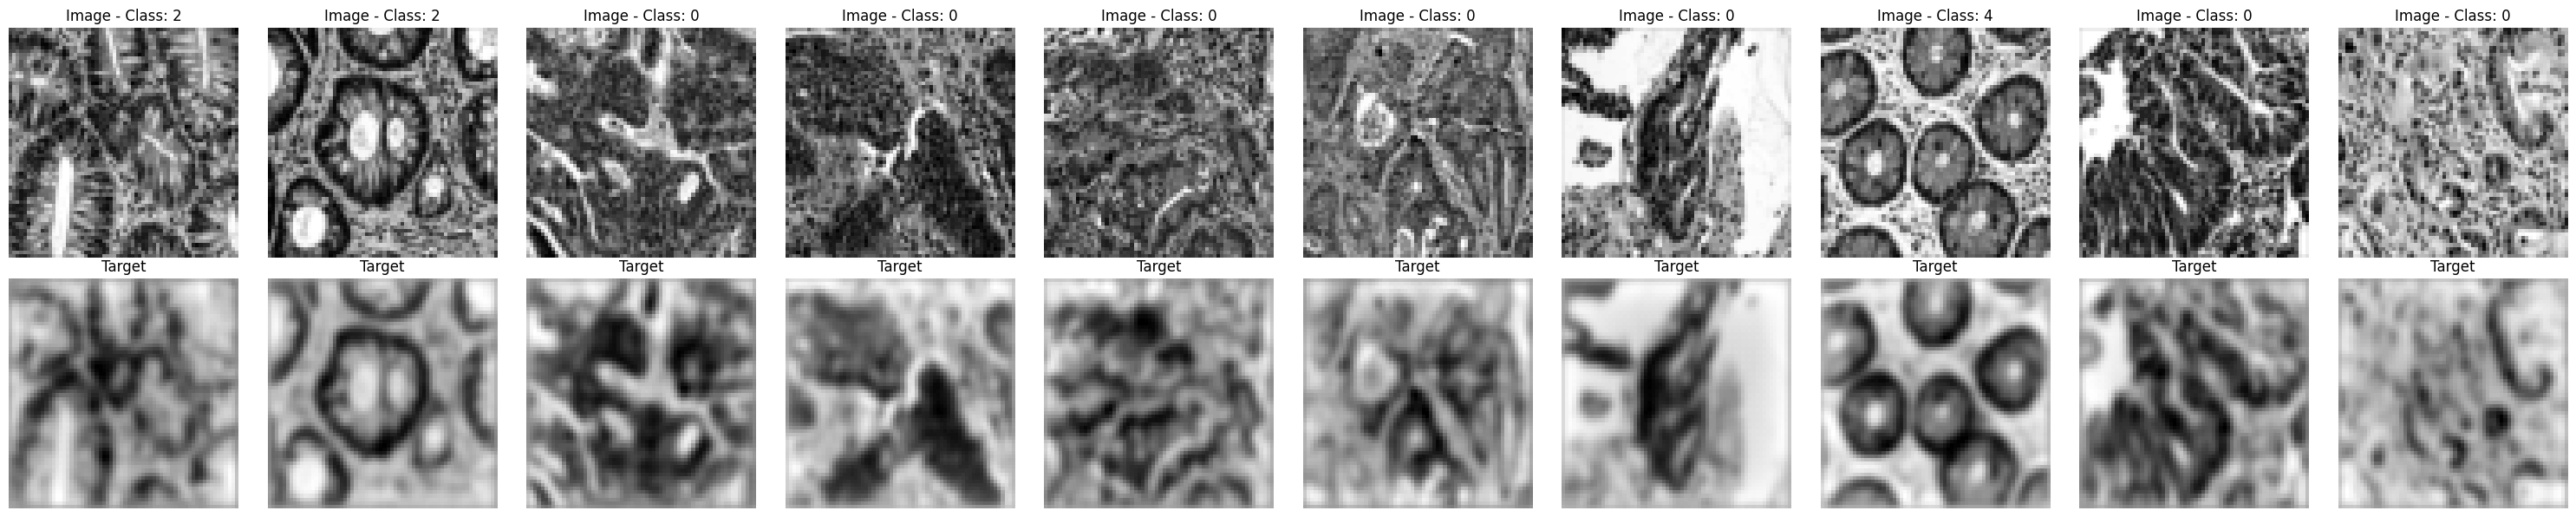

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]


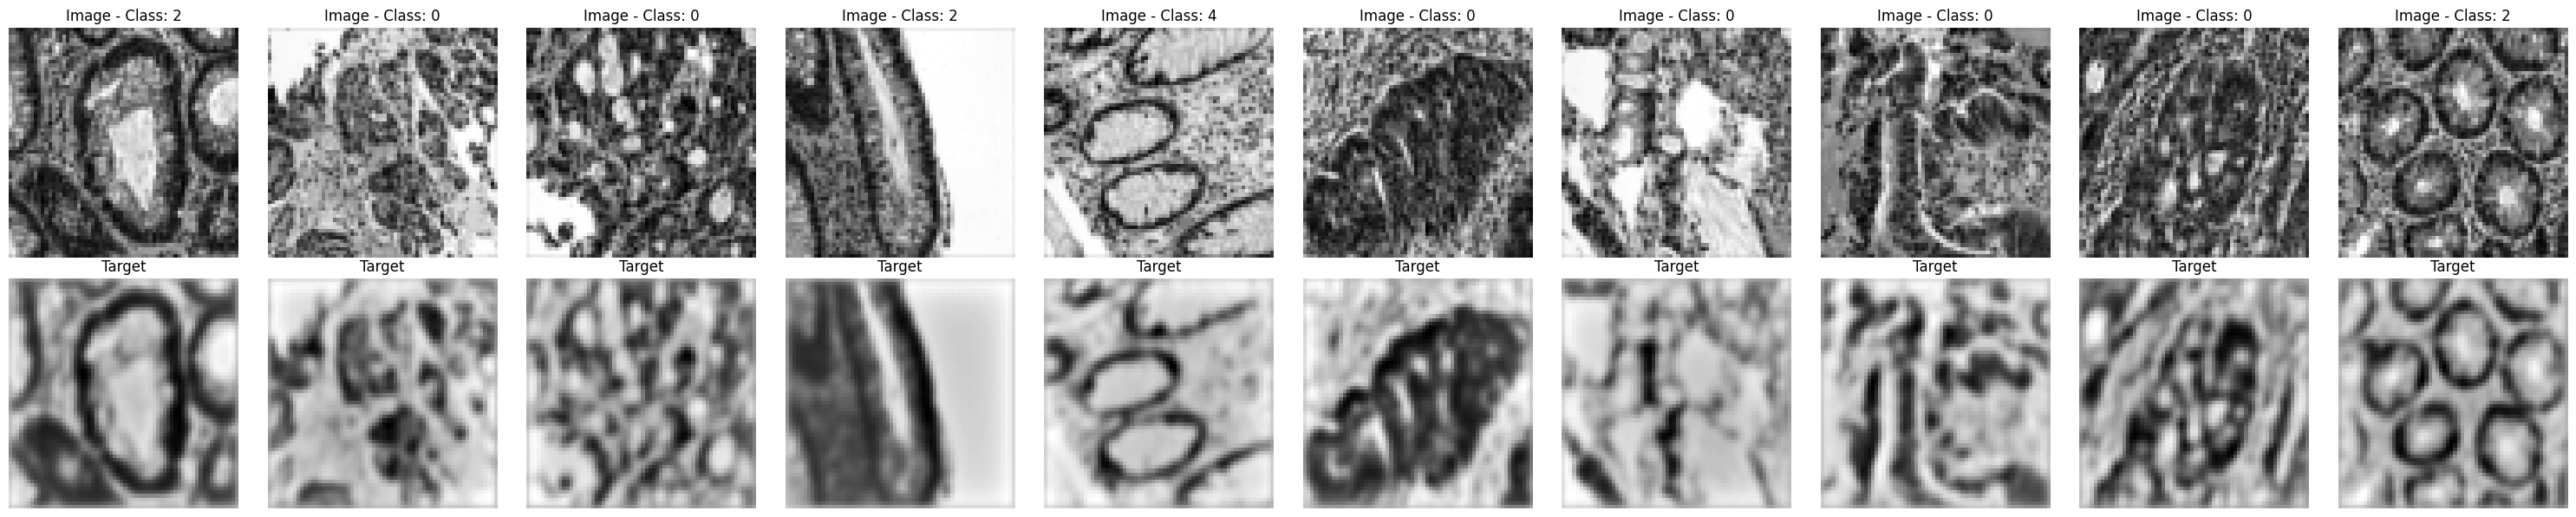

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.67it/s]


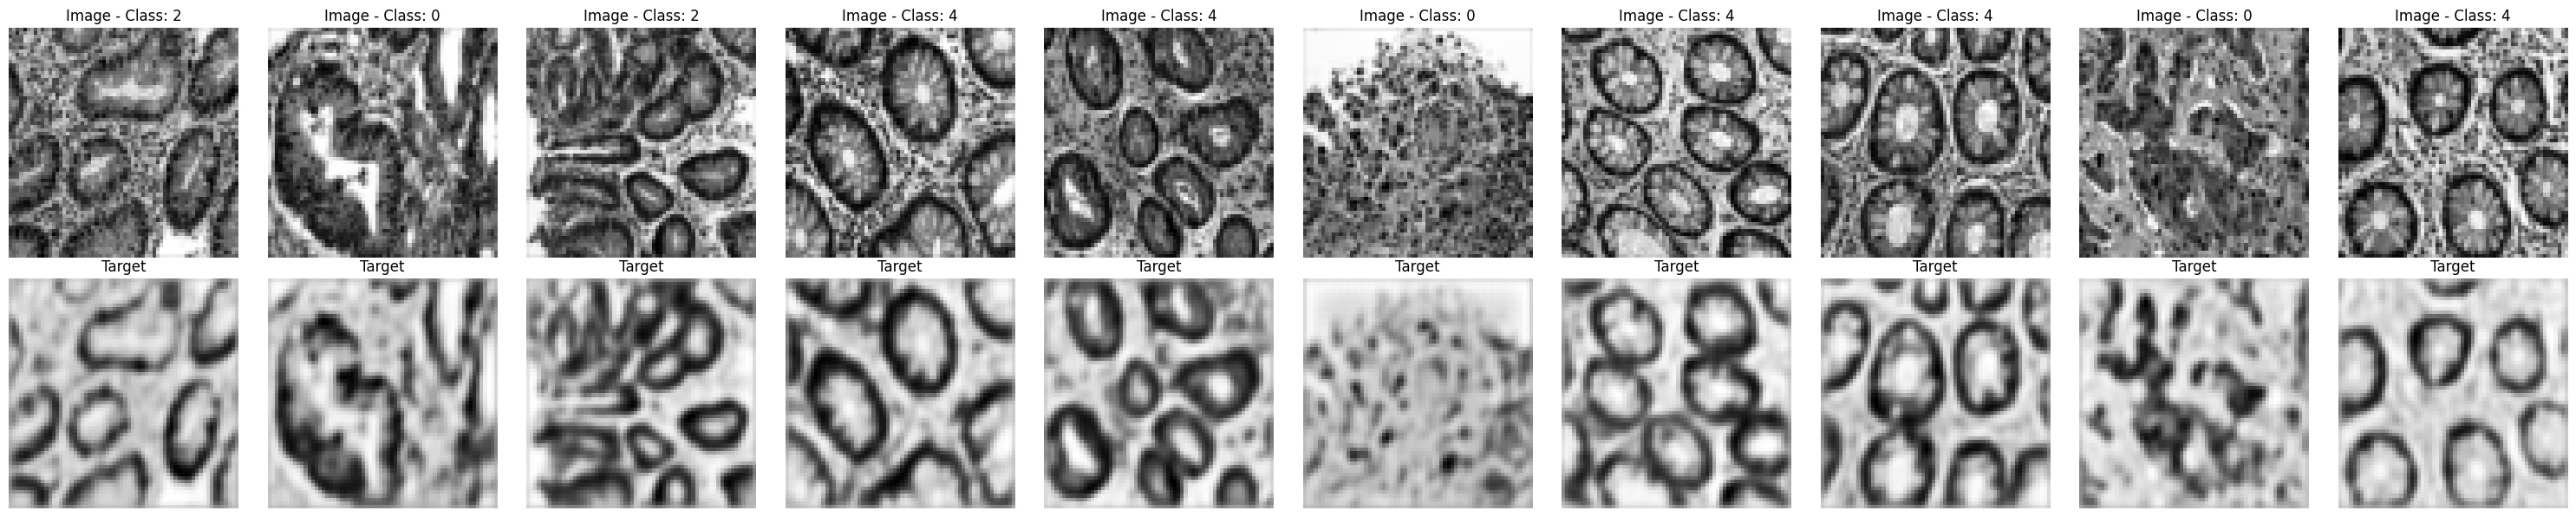

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.67it/s]


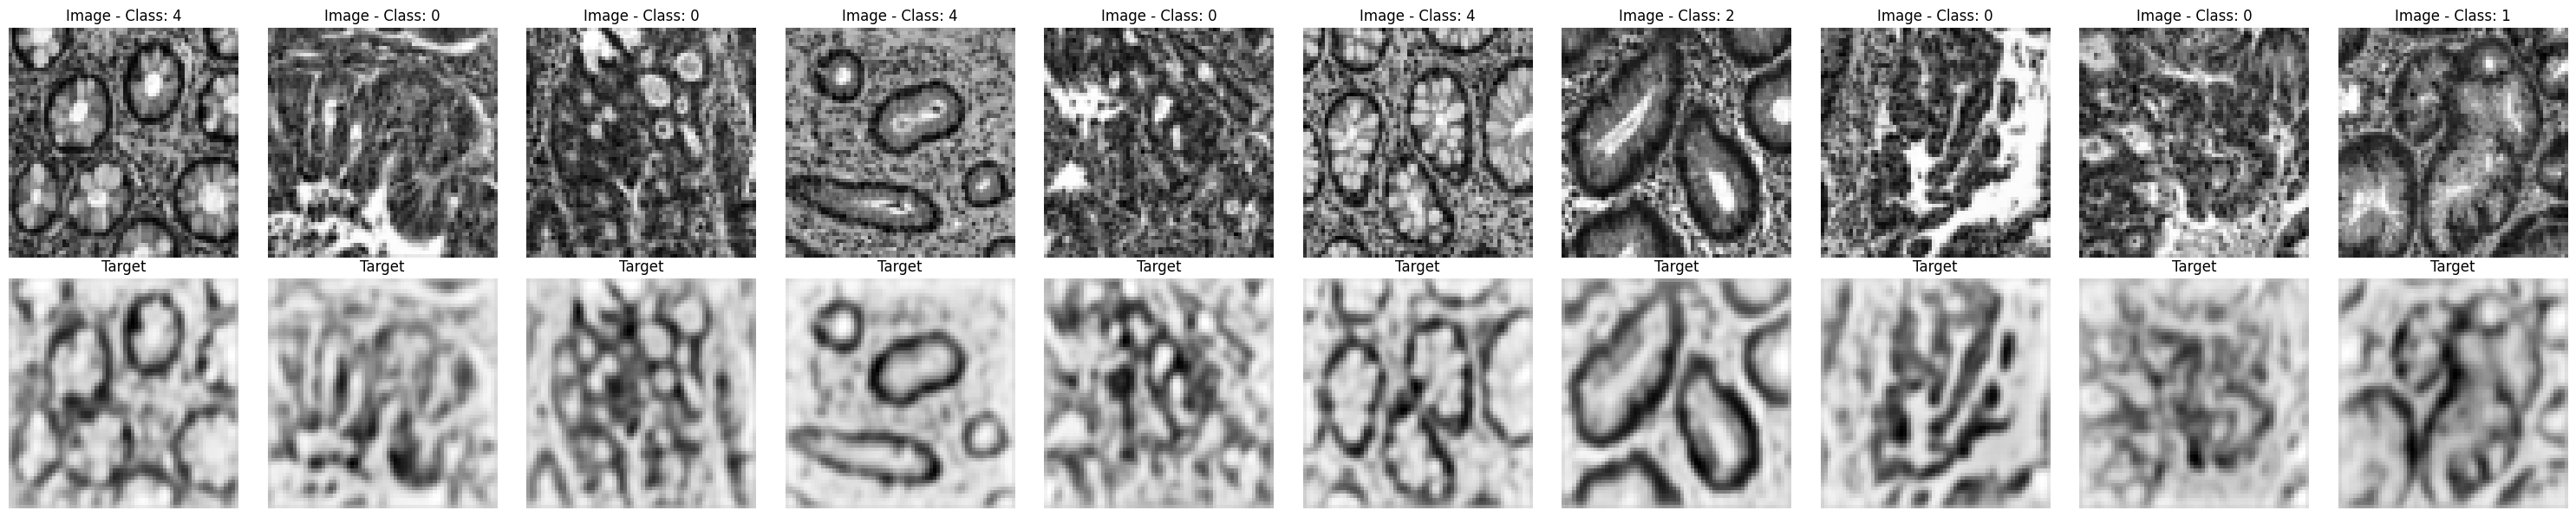

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.64it/s]


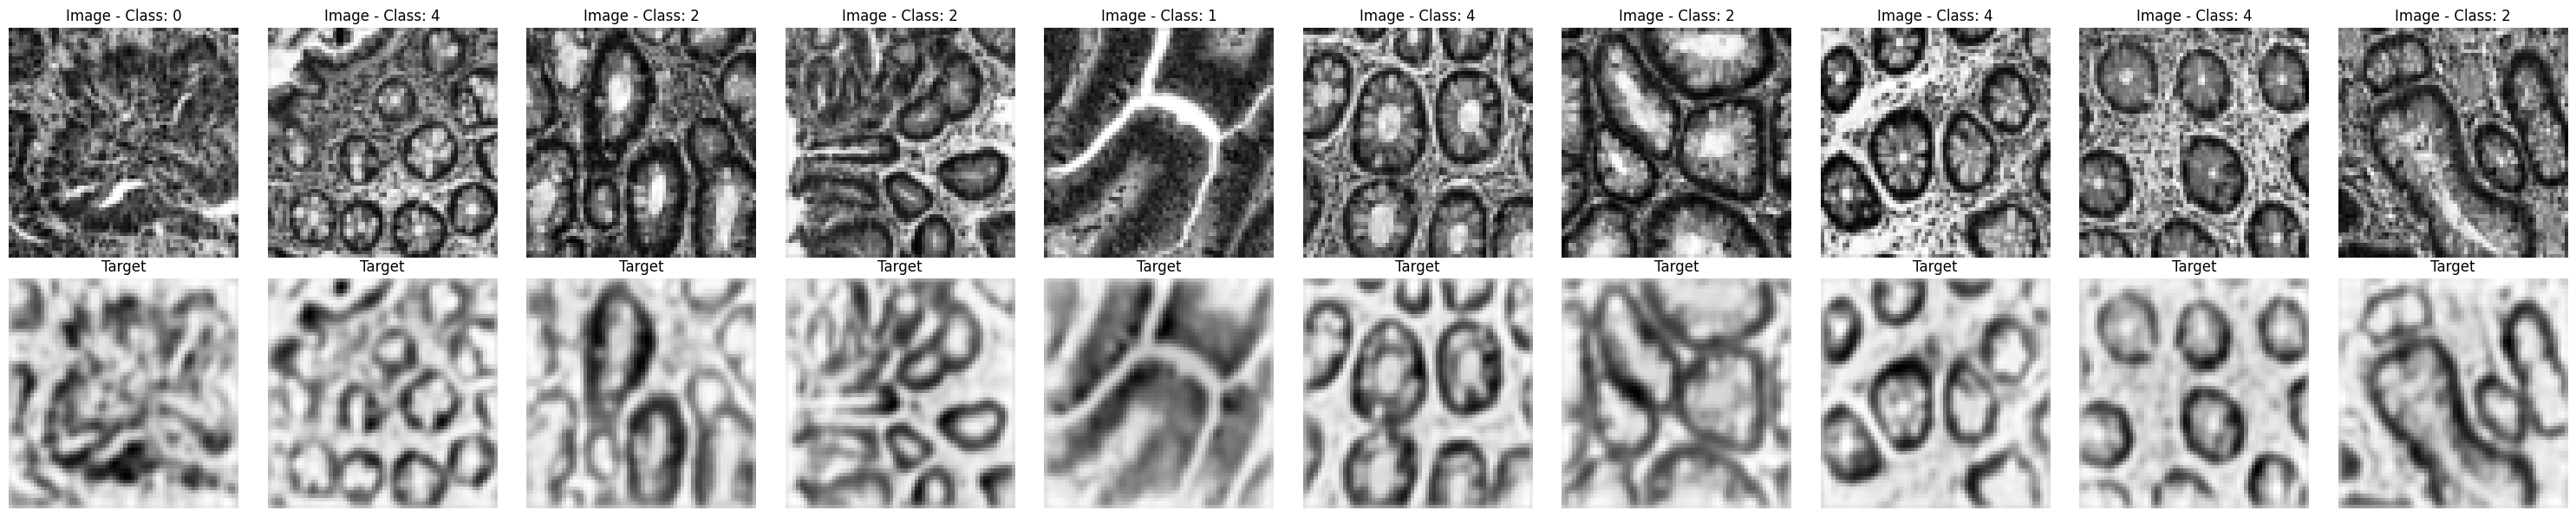

Testing the model... : 100%|██████████| 14/14 [00:09<00:00,  1.55it/s]


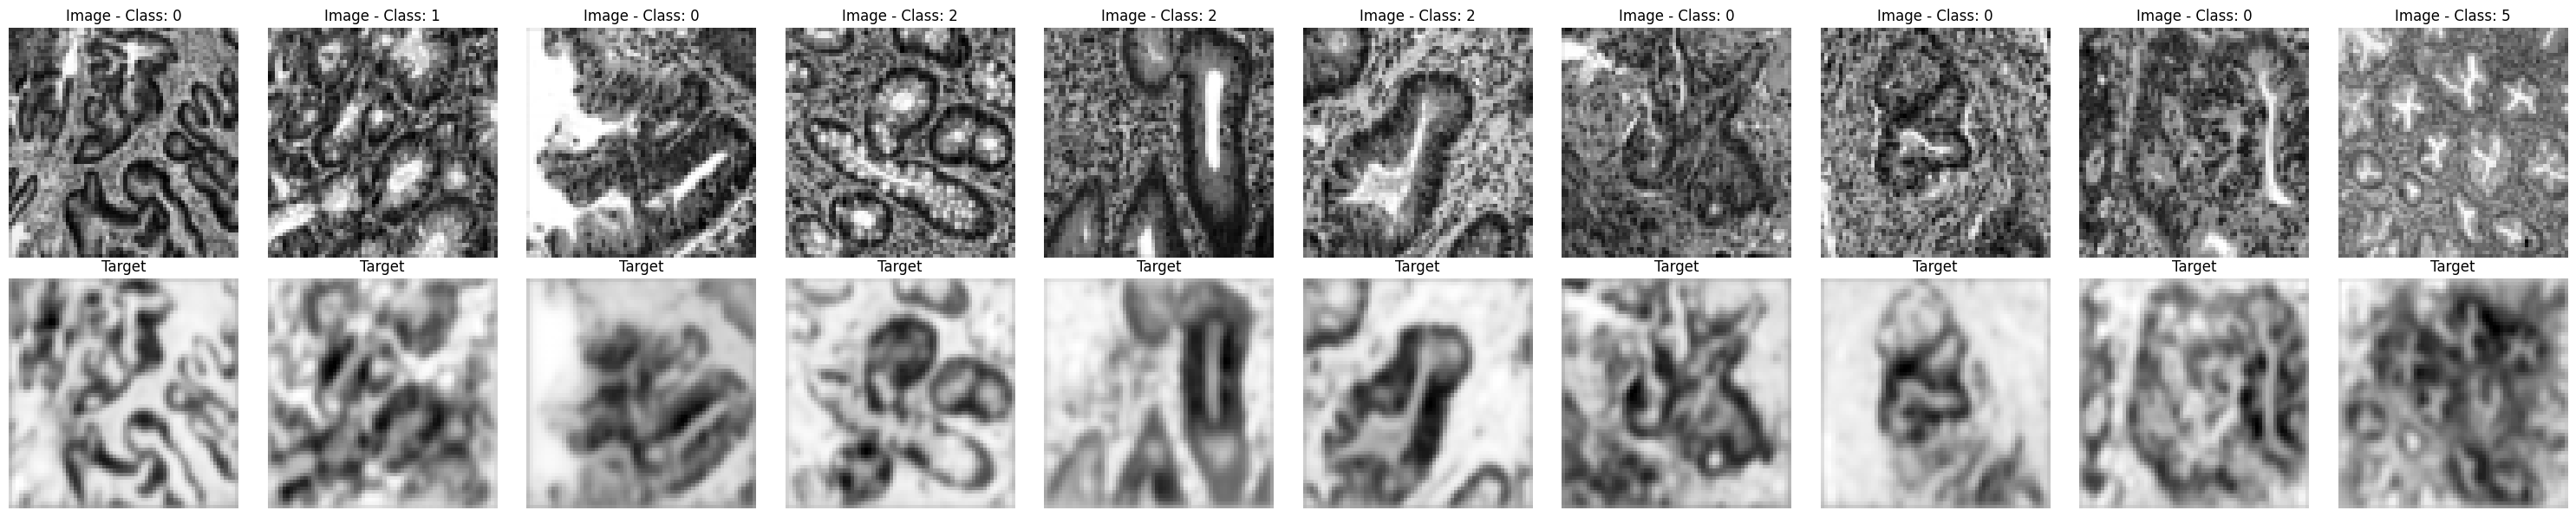

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.69it/s]


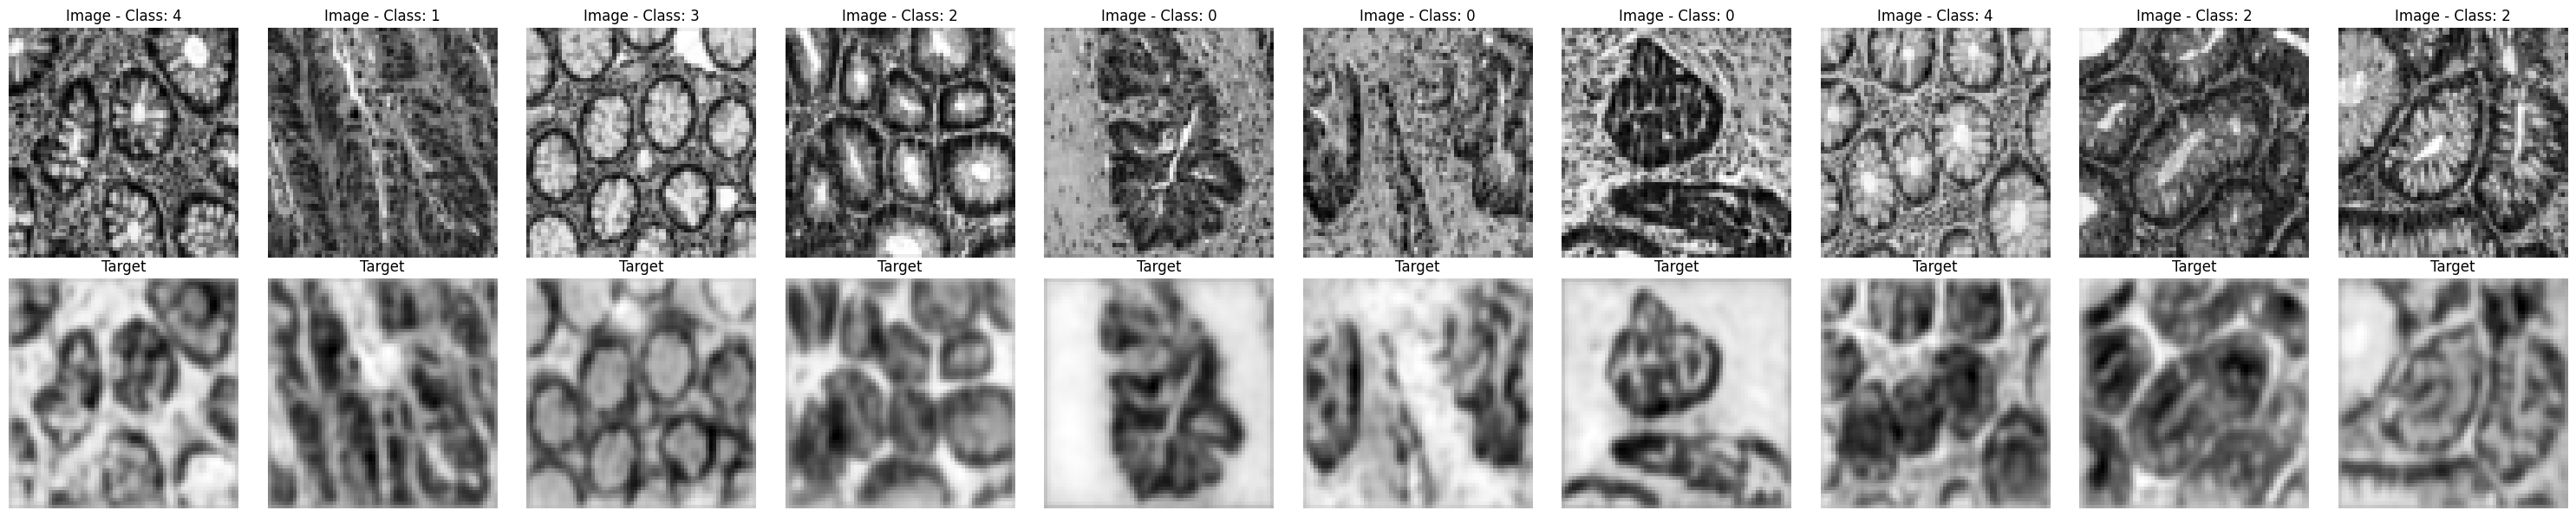

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.67it/s]


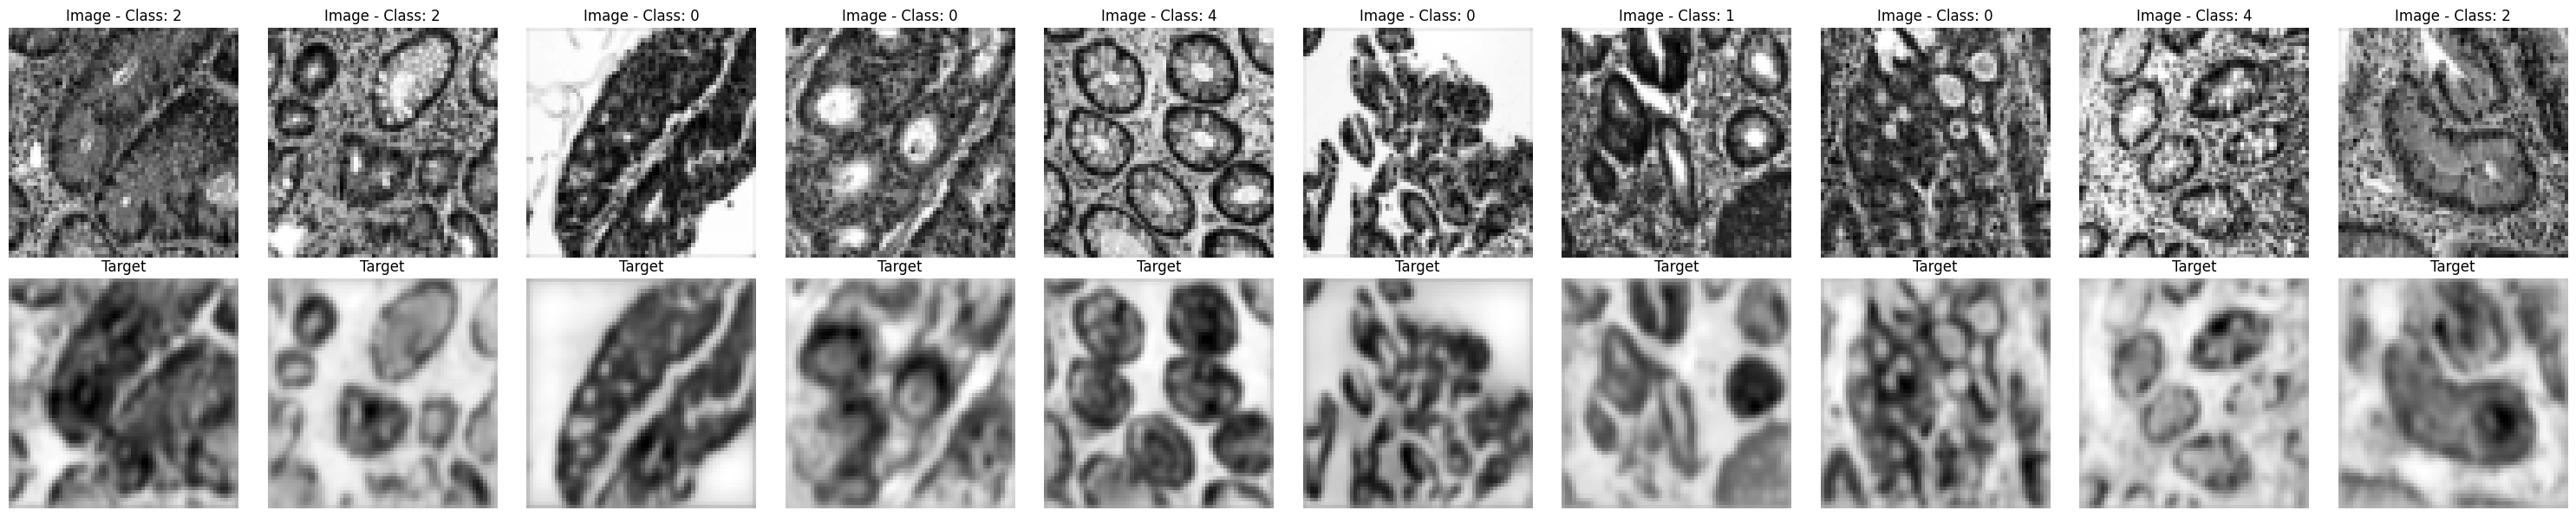

Testing the model... : 100%|██████████| 14/14 [00:24<00:00,  1.72s/it]


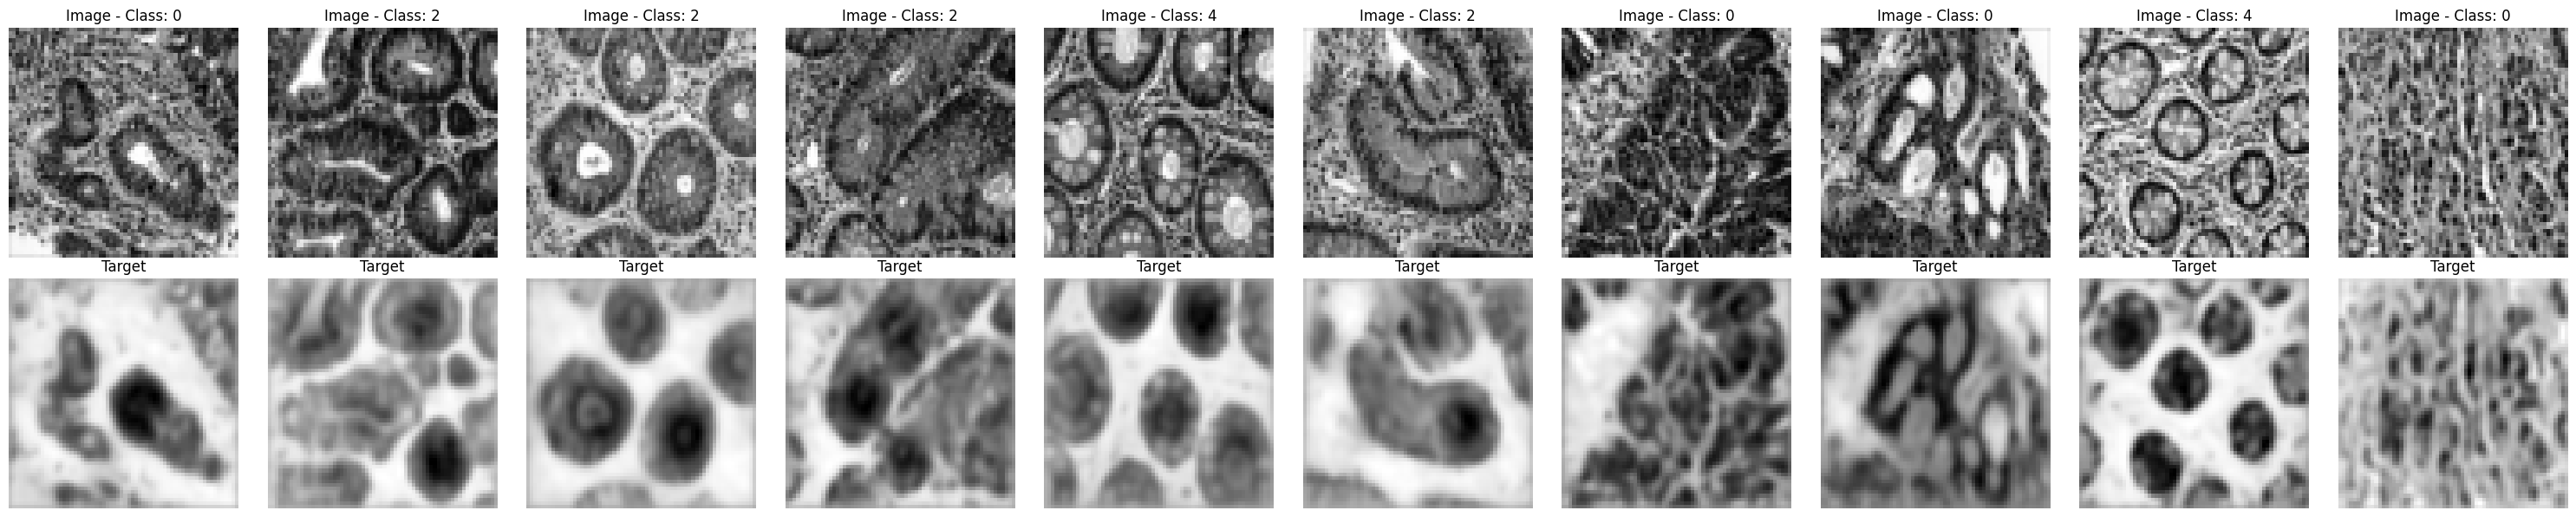

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.66it/s]


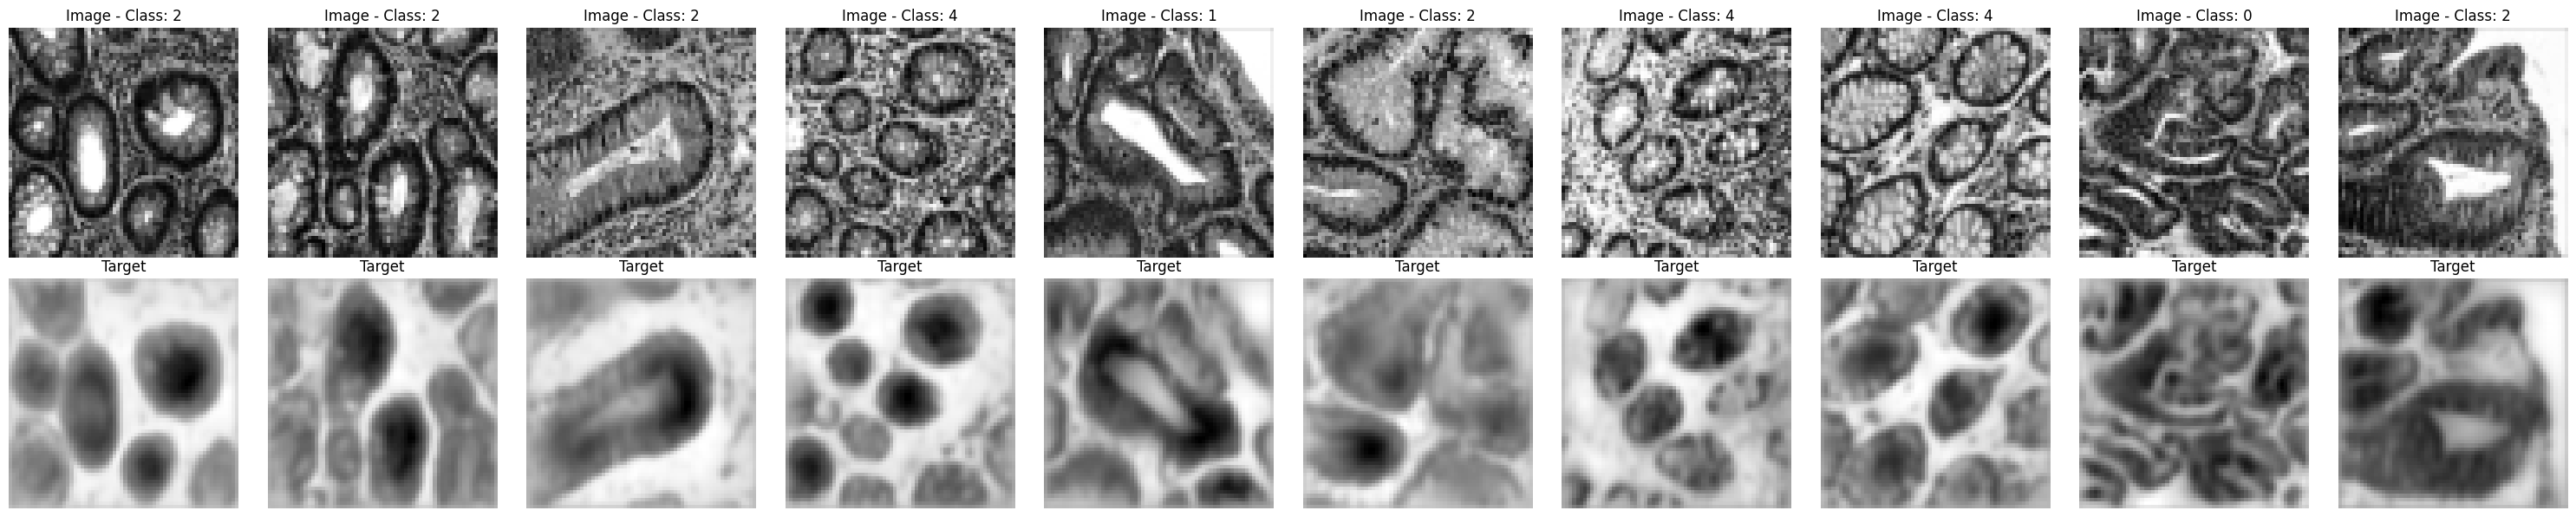

Testing the model... : 100%|██████████| 14/14 [00:25<00:00,  1.79s/it]


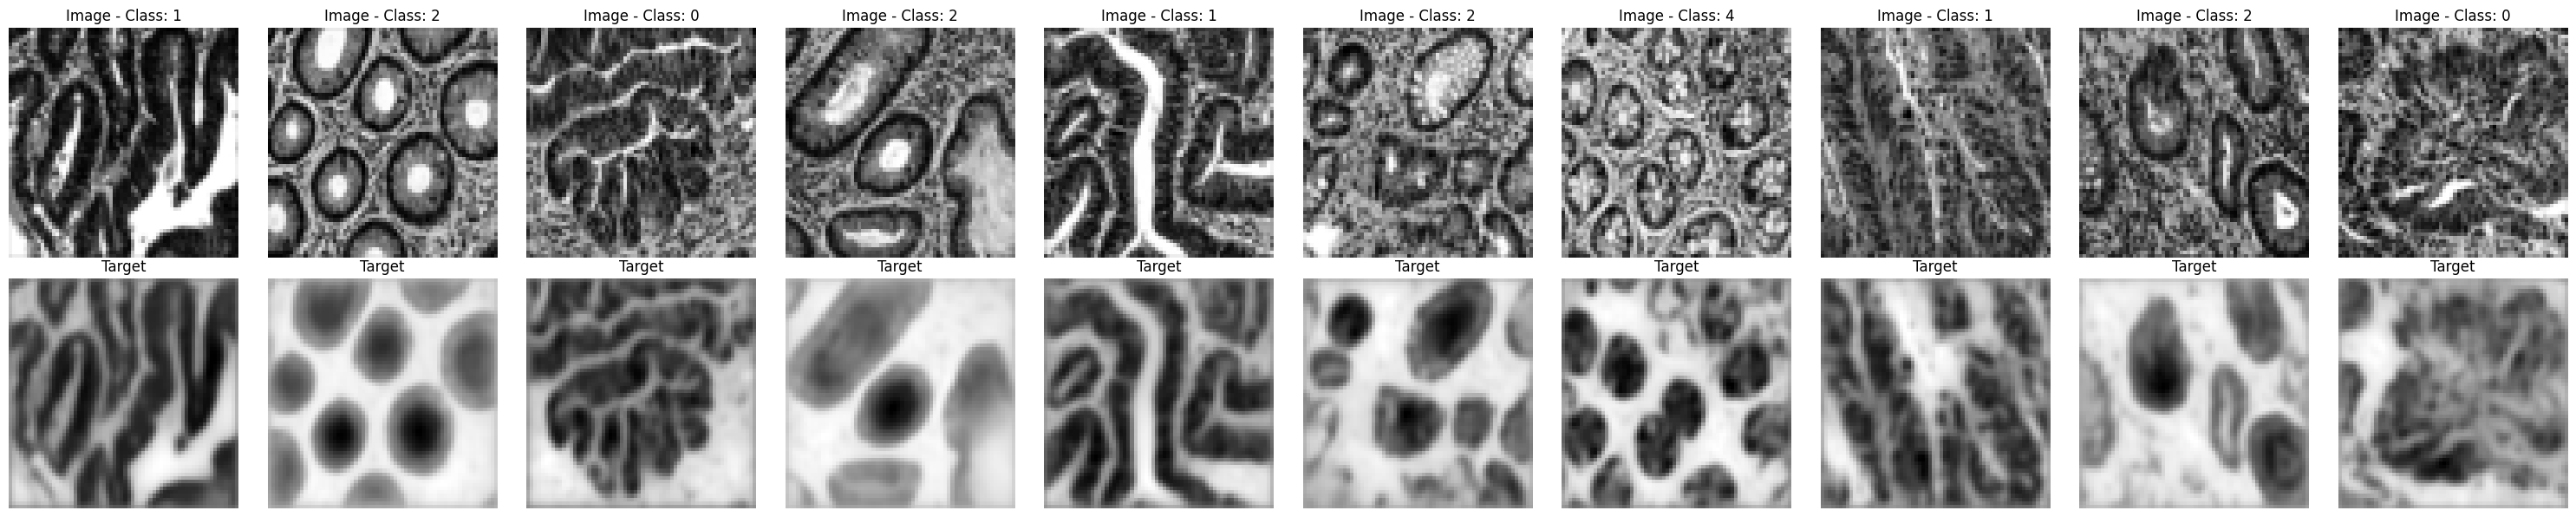

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.57it/s]


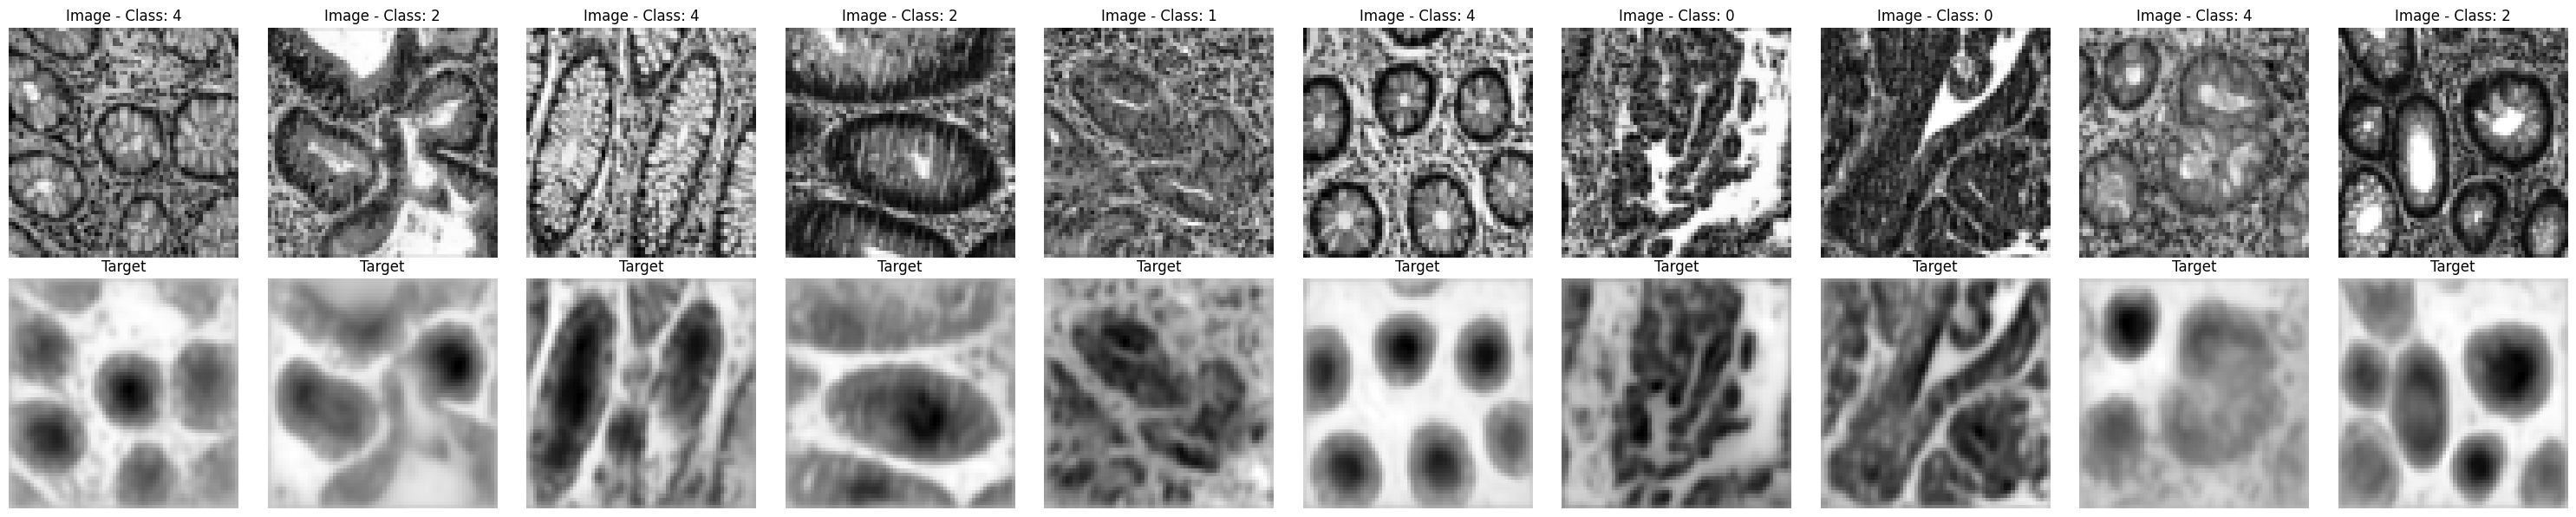

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.66it/s]


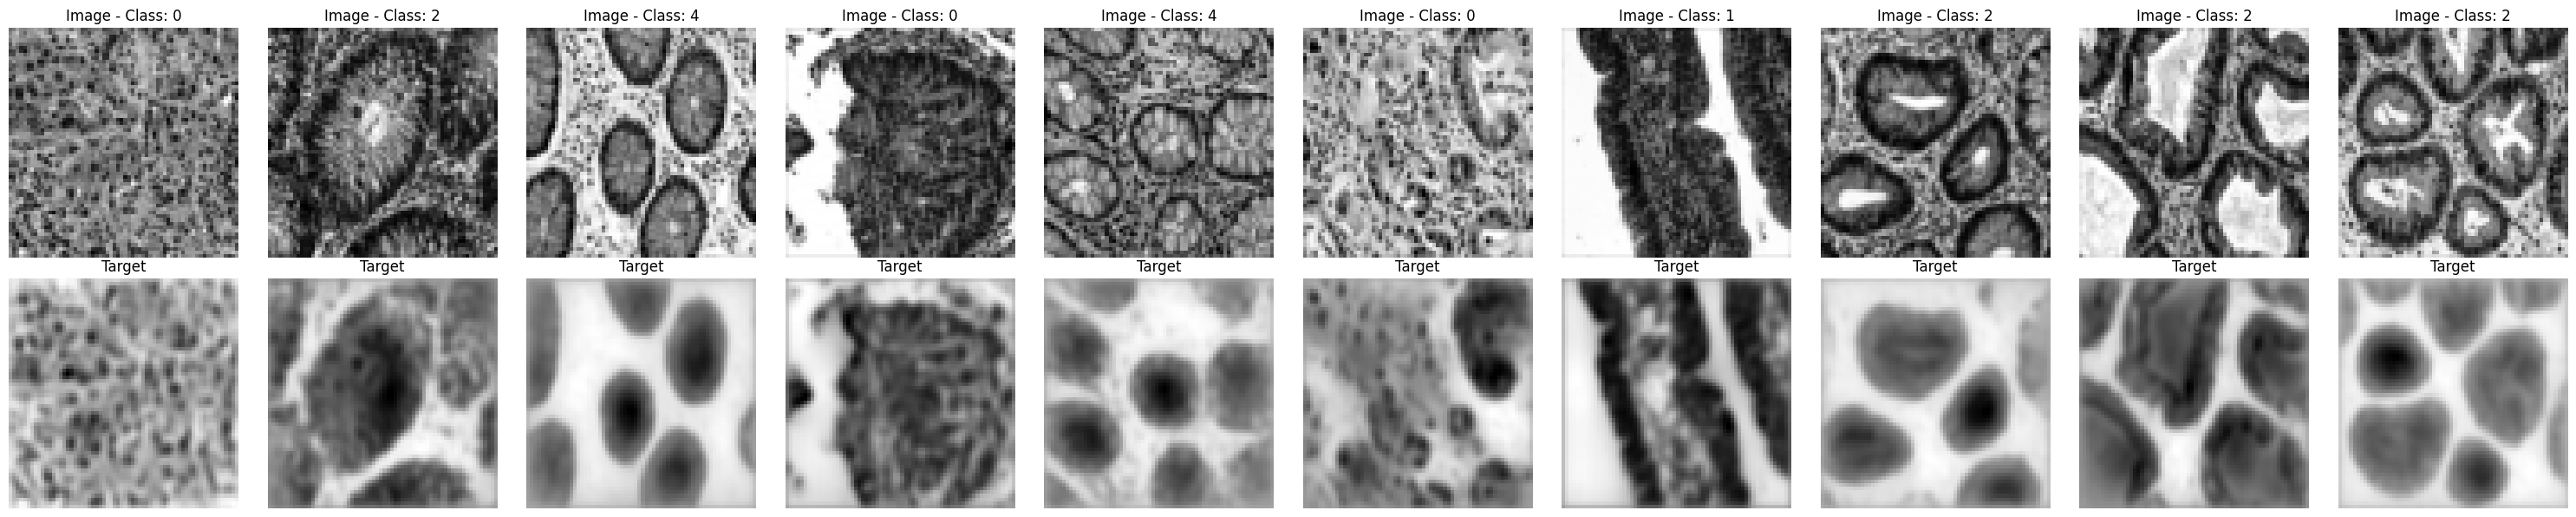

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]


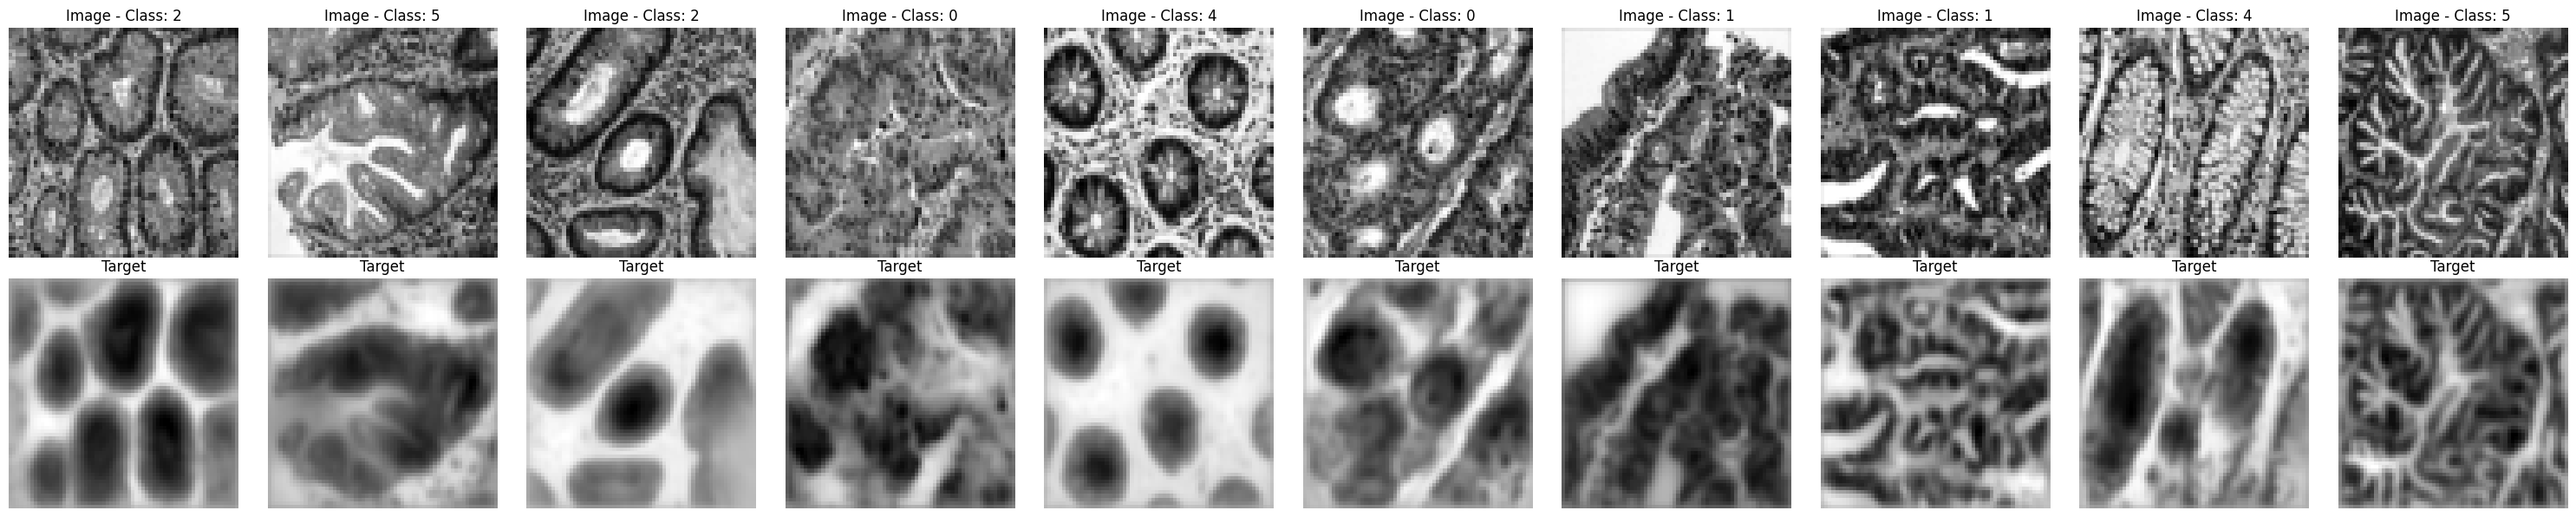

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]


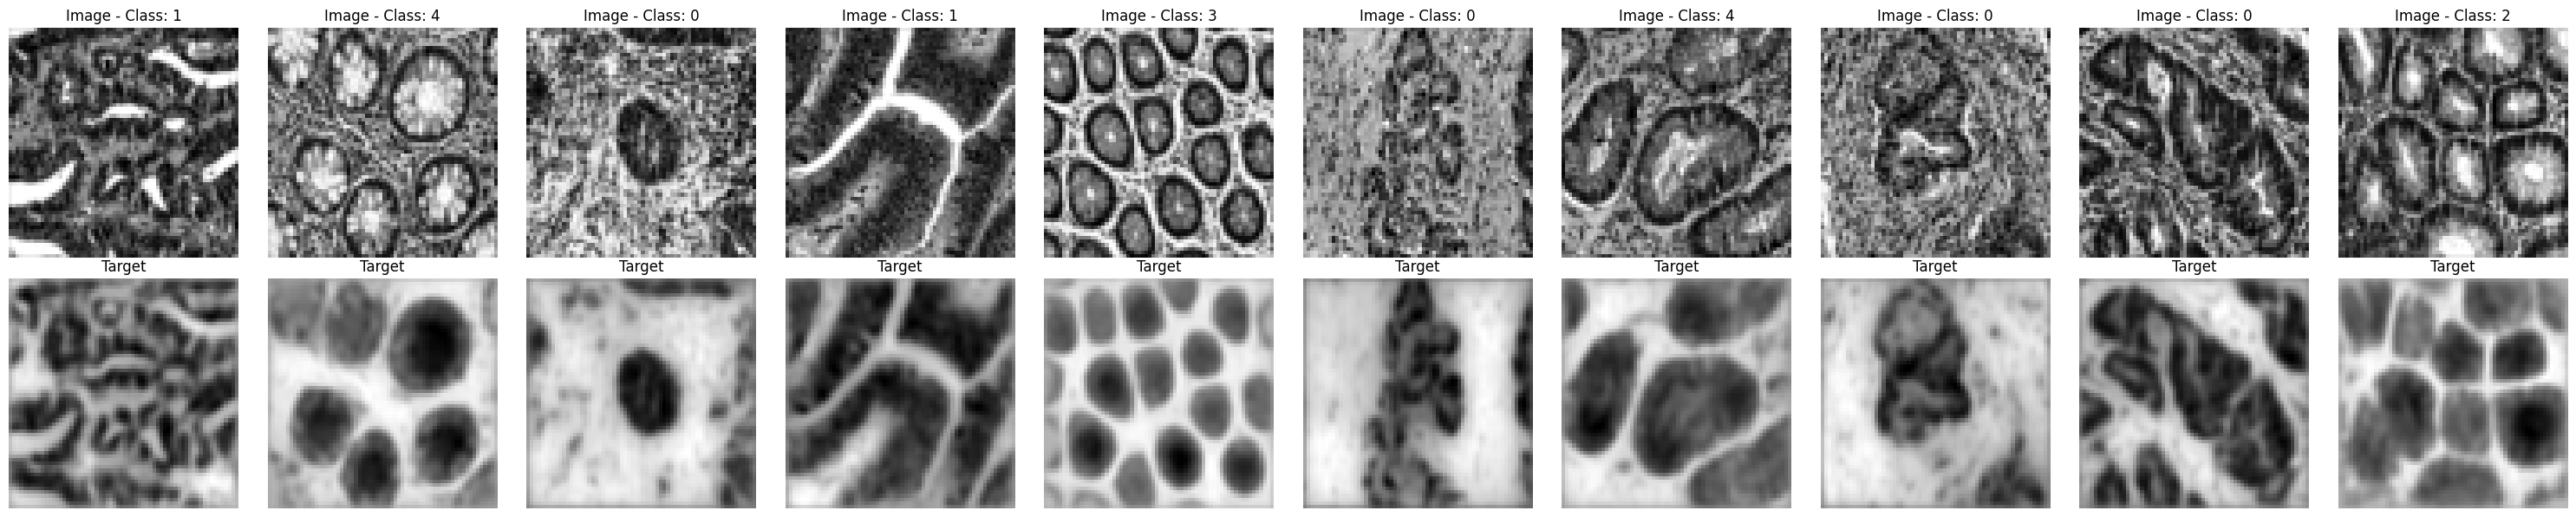

Testing the model... : 100%|██████████| 14/14 [00:26<00:00,  1.86s/it]


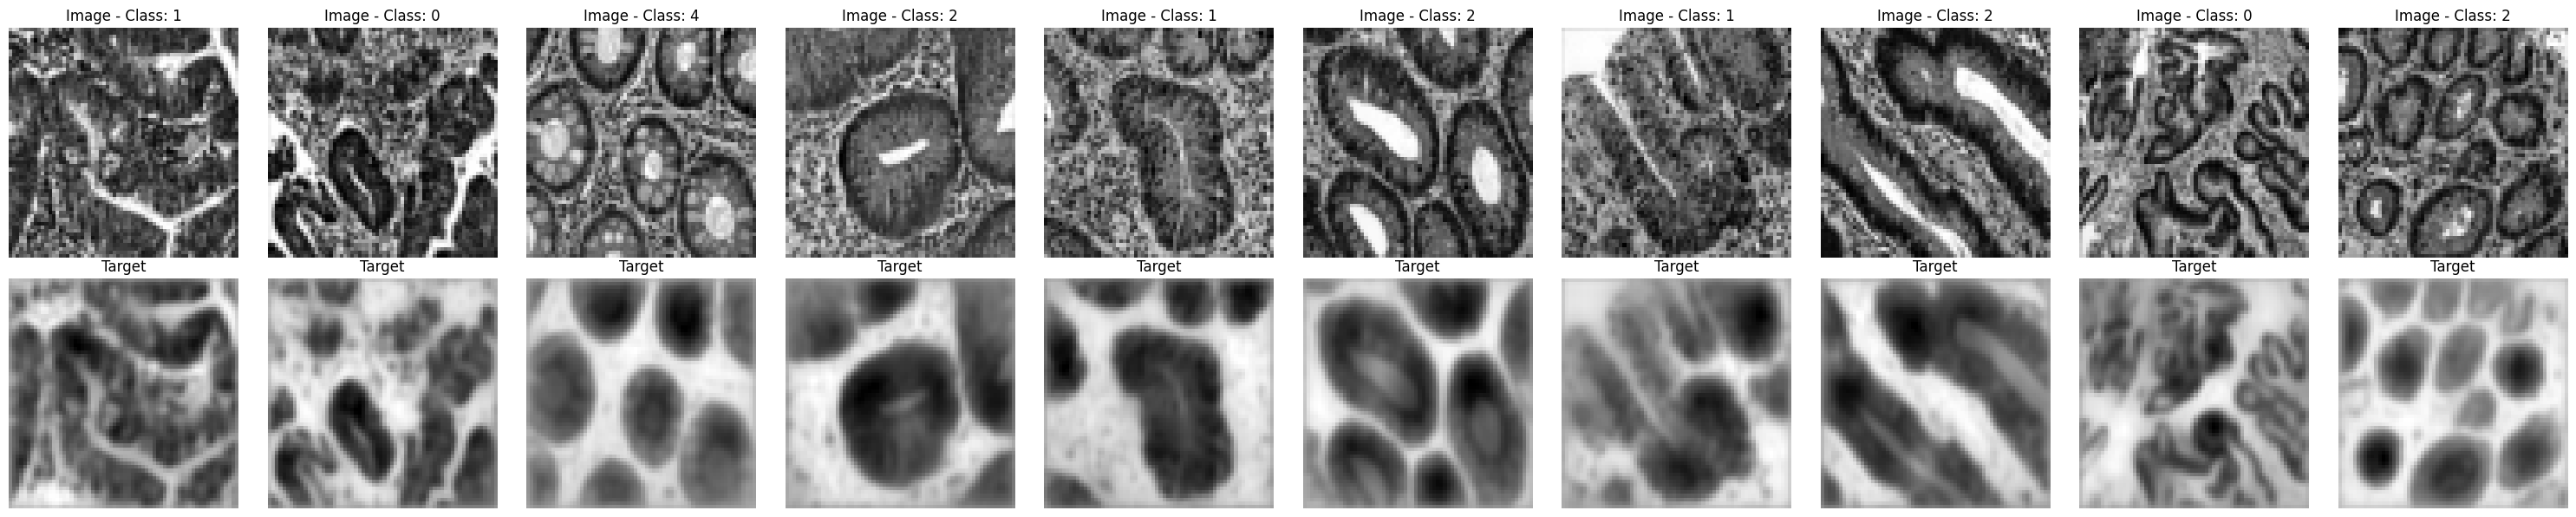

Testing the model... : 100%|██████████| 14/14 [00:26<00:00,  1.91s/it]


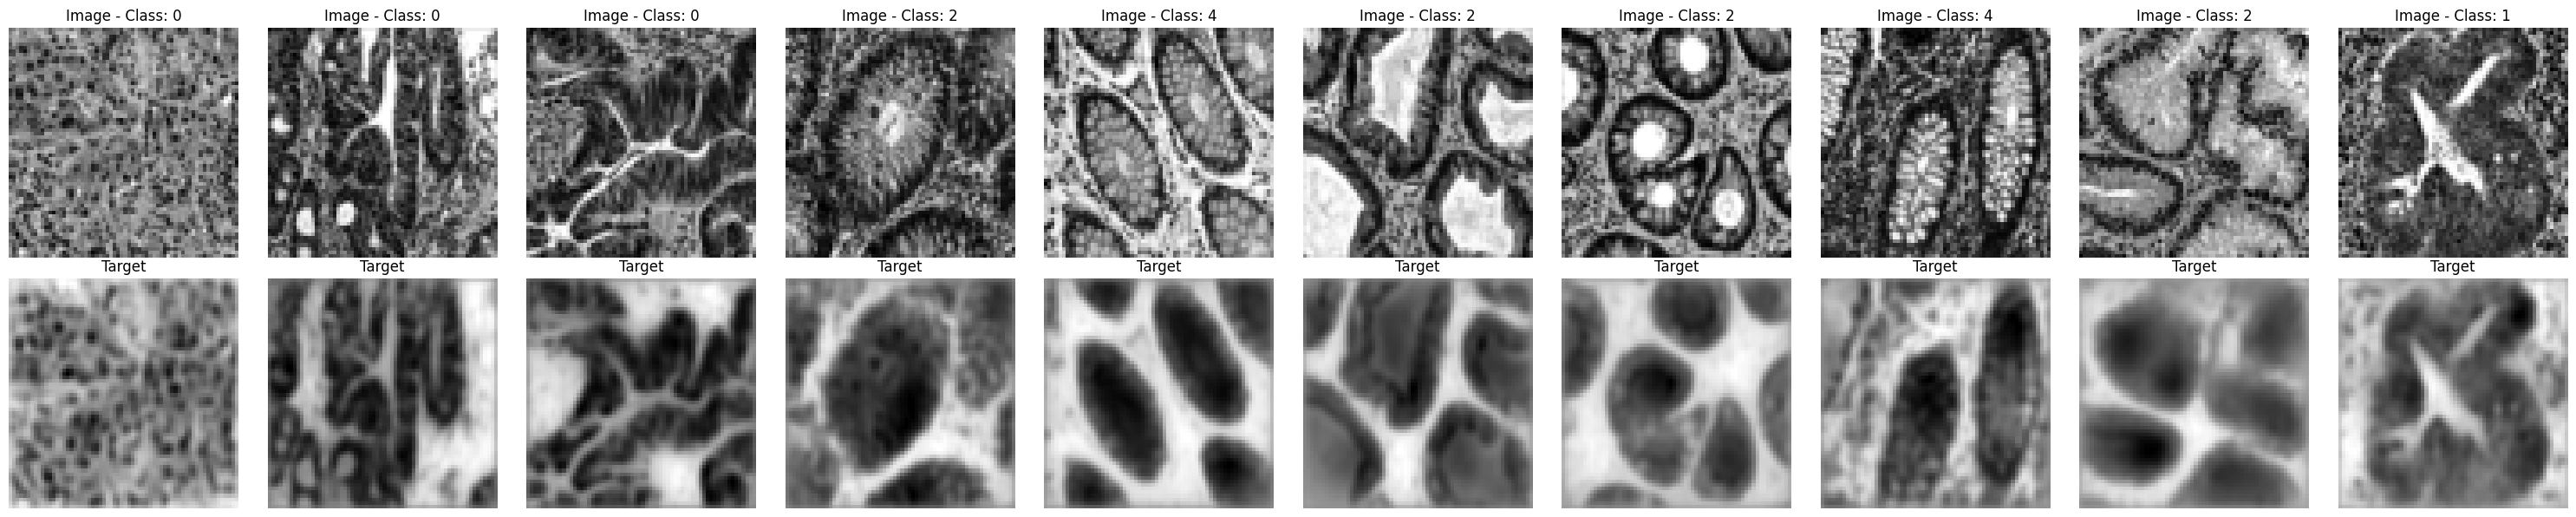

Testing the model... : 100%|██████████| 14/14 [00:23<00:00,  1.69s/it]


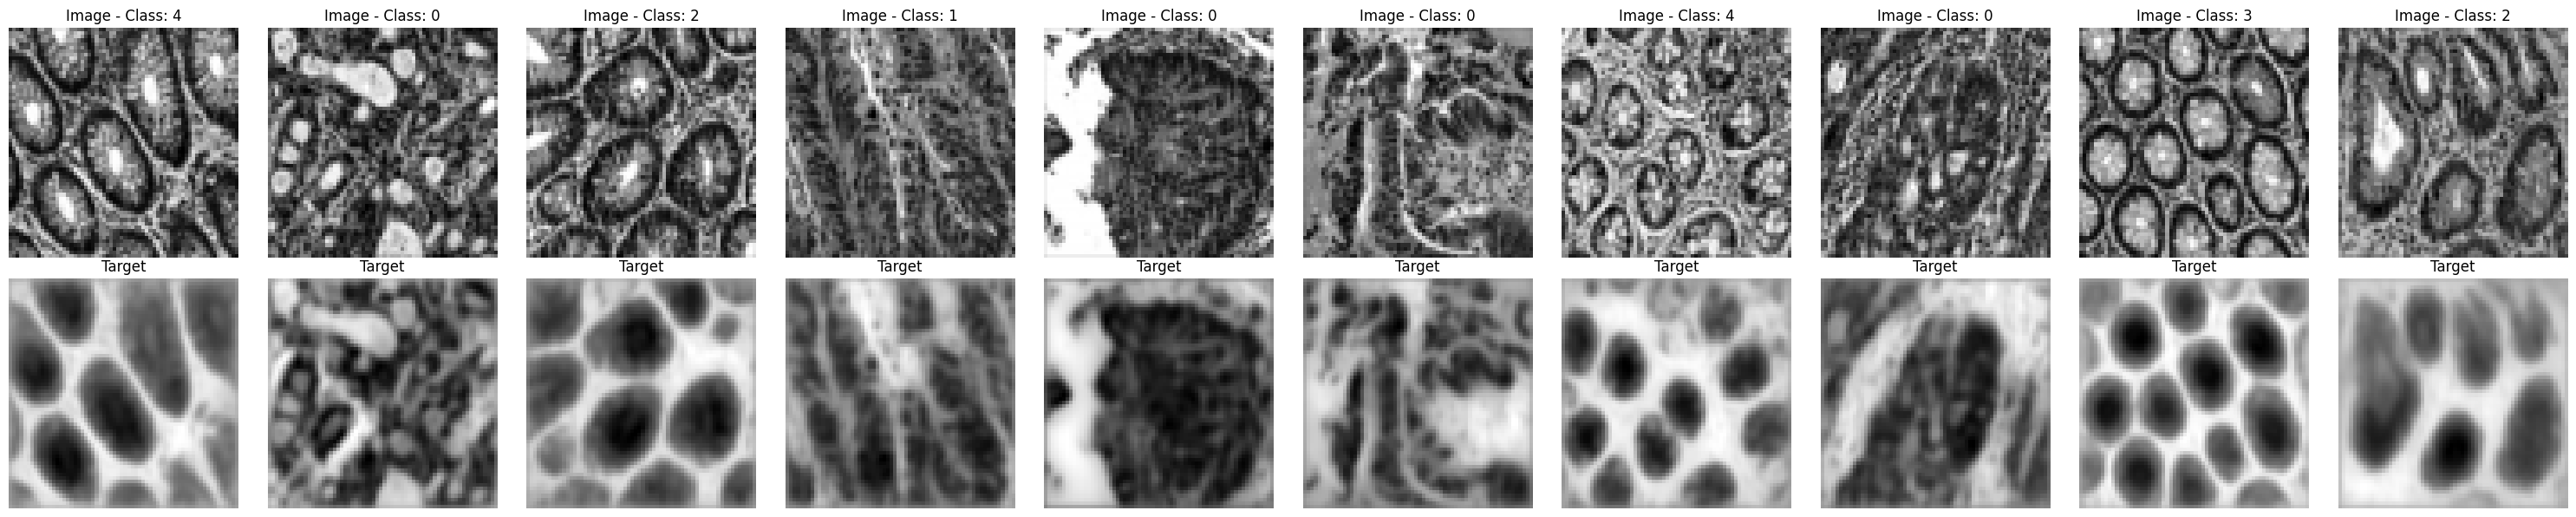

Testing the model... : 100%|██████████| 14/14 [00:23<00:00,  1.67s/it]


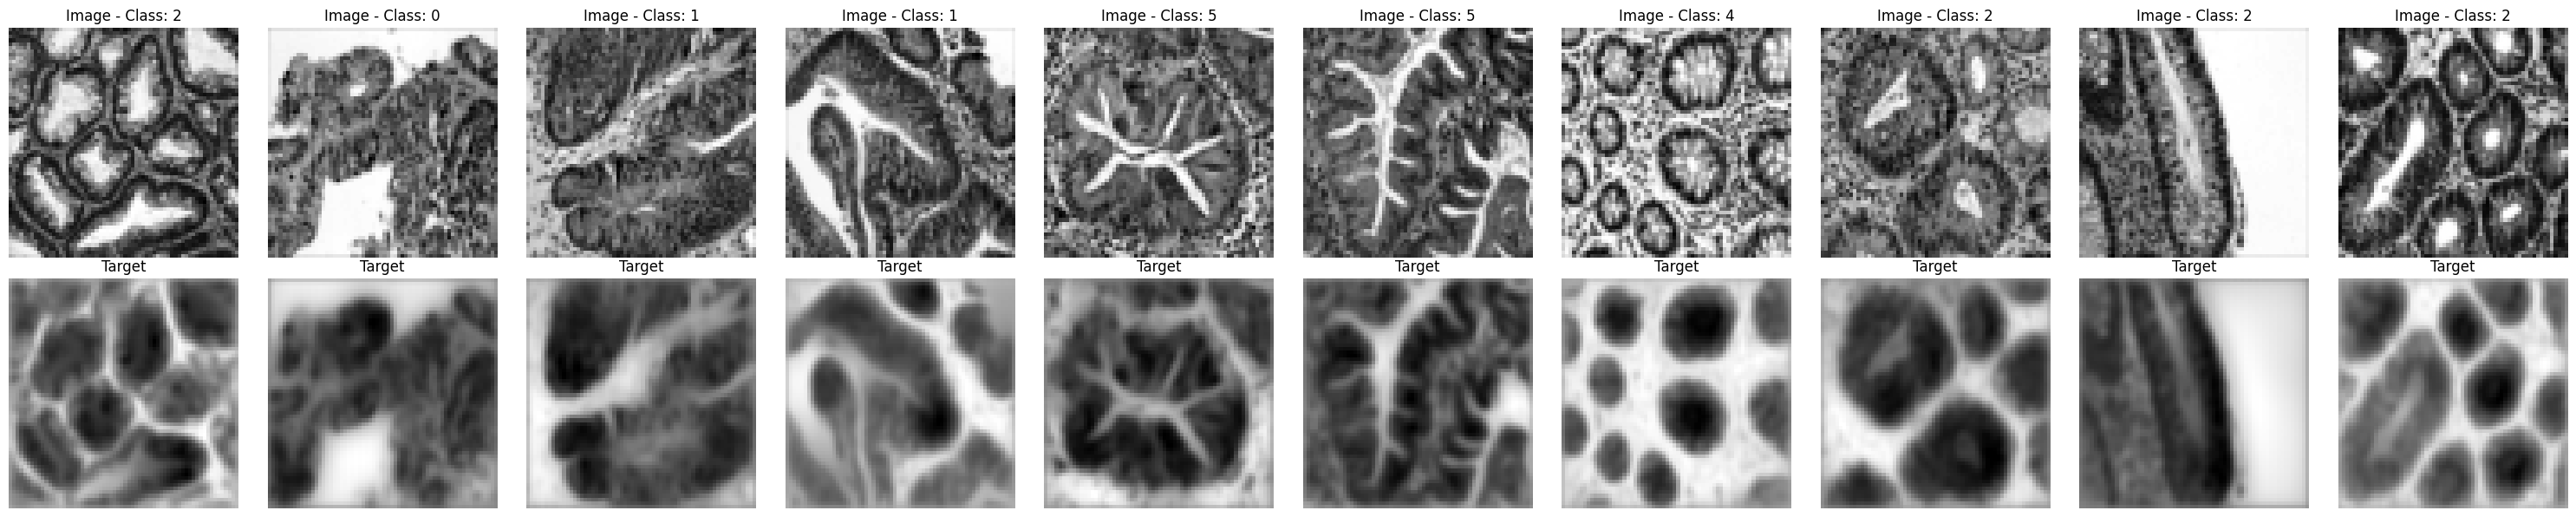

Testing the model... : 100%|██████████| 14/14 [00:23<00:00,  1.67s/it]


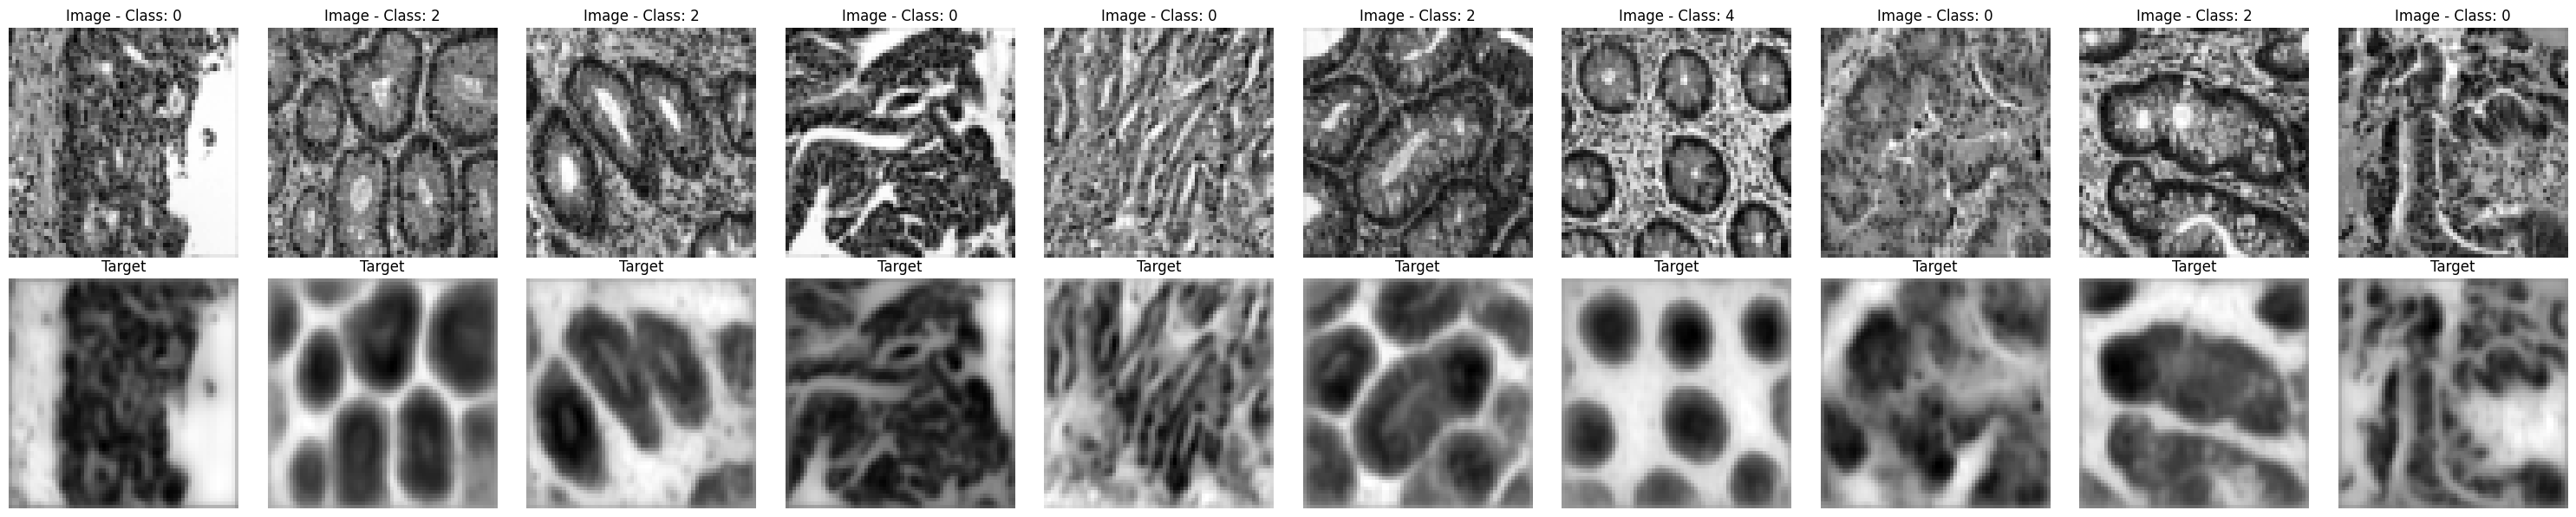

Testing the model... : 100%|██████████| 14/14 [00:12<00:00,  1.11it/s]


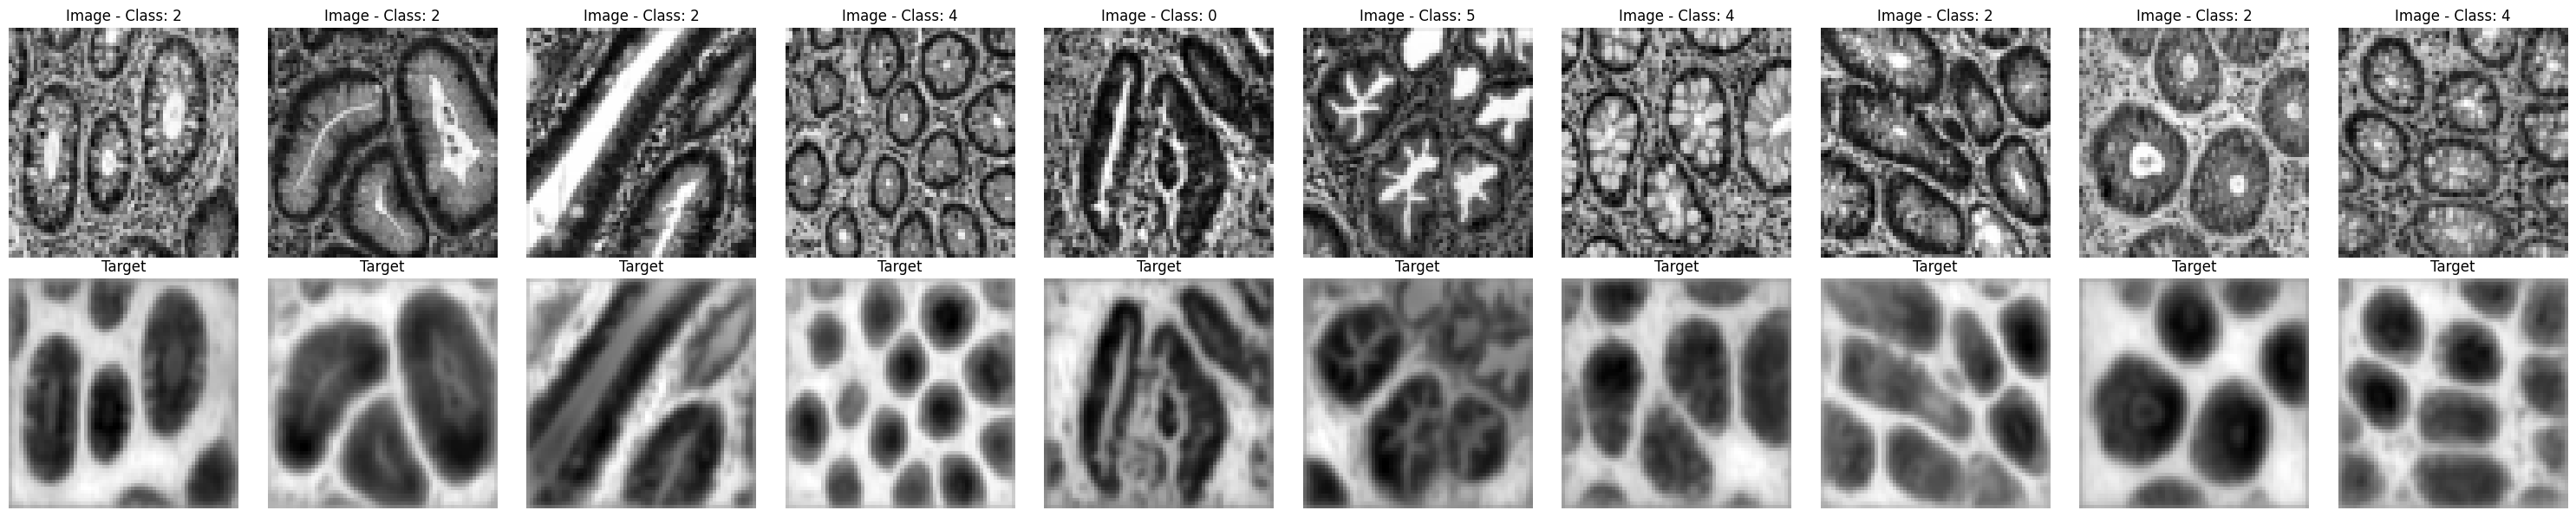

Testing the model... : 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]


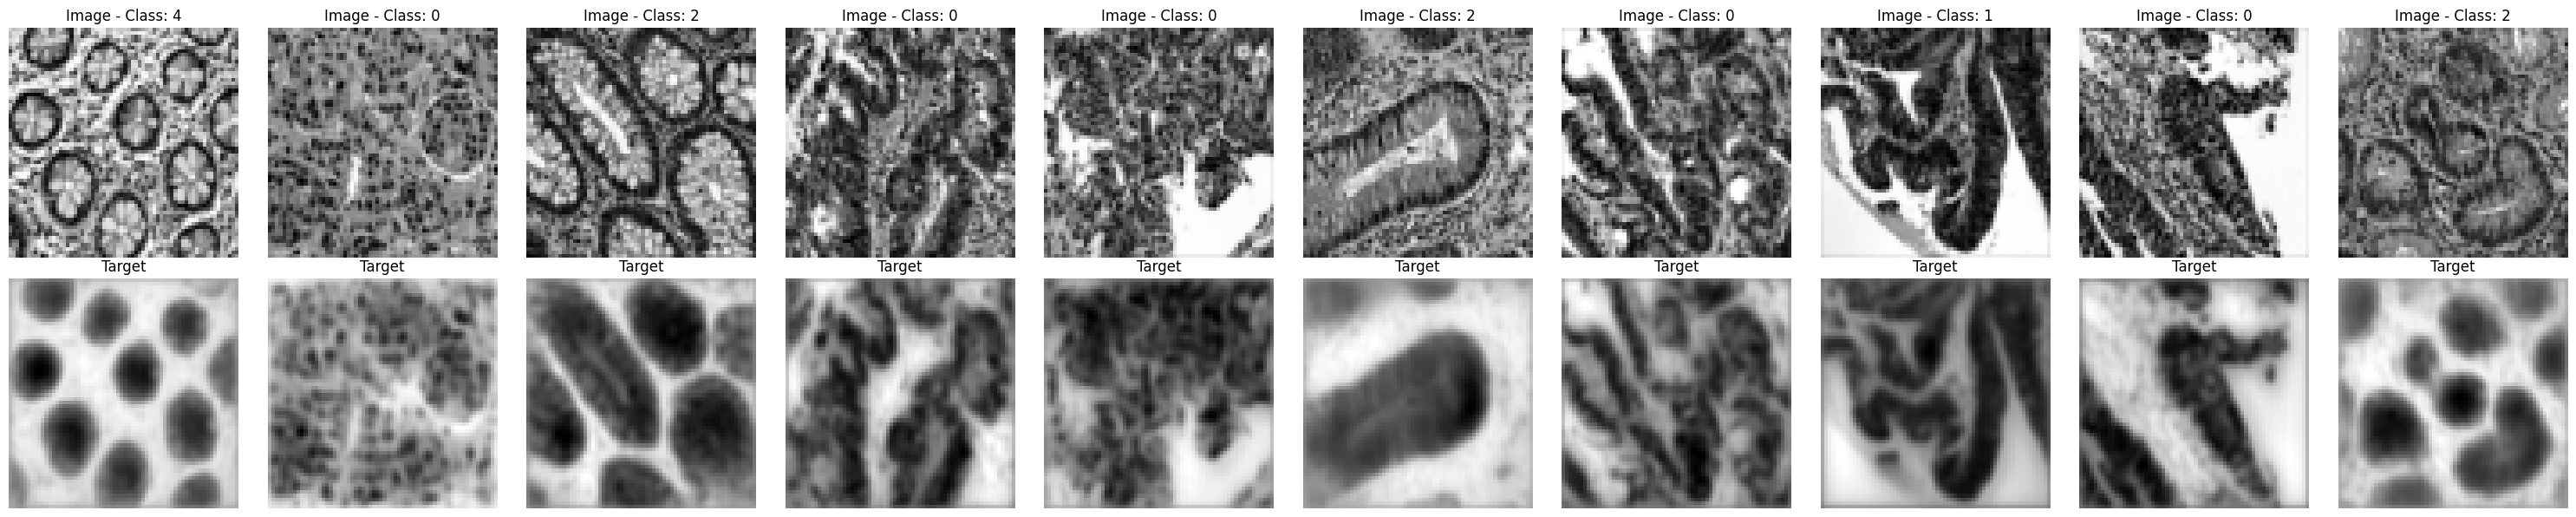

Testing the model... : 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]


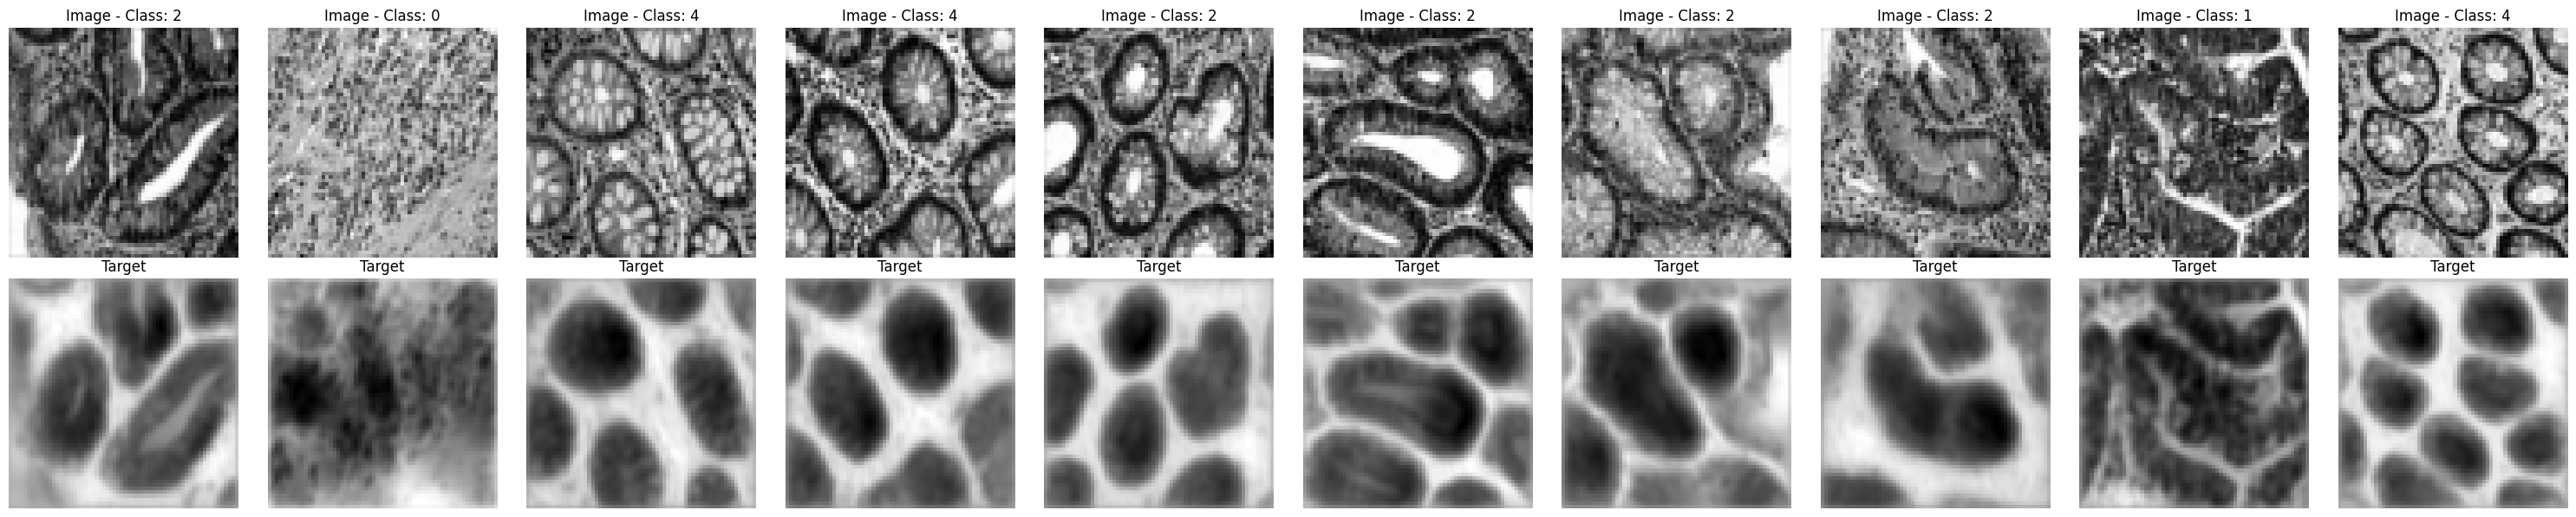

In [4]:
if __name__ == "__main__":
    main()